# Below is linear regression on the merged dataset getting an R^2 of .918

/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['MA_Line2' 'X2TPr_D' 'X2TSc_D' 'X2TPr_S' 'X2TSc_S' 'PA-PostD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Linear Regression Model Mean Squared Error: 485787048.63270885
Linear Regression Model R-squared: 0.9183508631731997


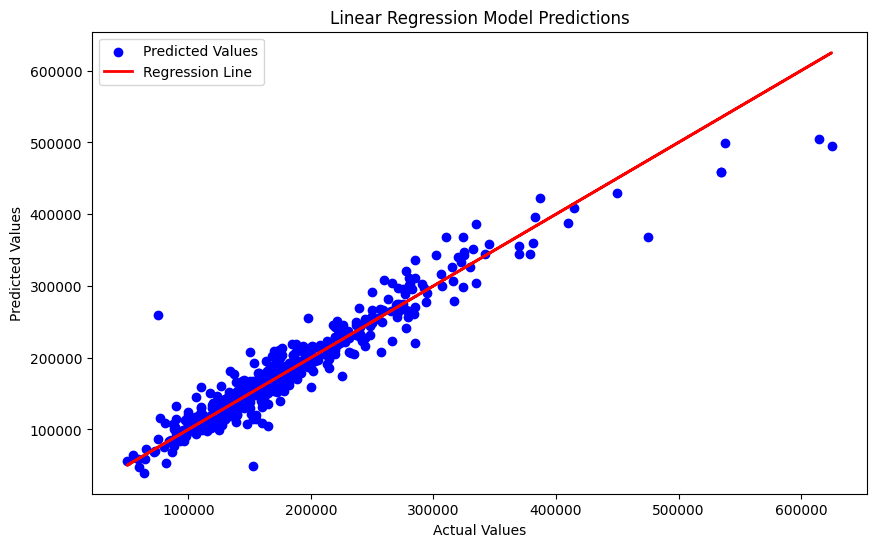

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Import the functions from the module
from data_processing_module import load_data, preprocess_data, split_data

# Cell 2: Use the imported functions
file_path = 'merged3.csv'  # Update this path to the location of your file
target_column = 'SalePrice_x'
drop_columns = ['Unnamed: 0', 'PID', 'Index']

# Load the data
data = load_data(file_path)

# Preprocess the data
X_preprocessed, y, preprocessor = preprocess_data(data, target_column, drop_columns)

# Split the data
X_train, X_test, y_train, y_test = split_data(X_preprocessed, y)

# Define and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Make predictions with the Linear Regression model
y_pred_lr = linear_regression.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Model Mean Squared Error: {mse_lr}')
print(f'Linear Regression Model R-squared: {r2_lr}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted Values')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model Predictions")
plt.legend()
plt.show()


# Below is a q-q plot to check the heterscedascity of the data, for most of the data the q-q plot is what you want, exactly on the line, however there is some data on the right of the data that does not show normality of residuals

/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['MA_Line2' 'X2TPr_D' 'X2TSc_D' 'X2TPr_S' 'X2TSc_S' 'PA-PostD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Linear Regression Model Mean Squared Error: 485787048.63270885
Linear Regression Model R-squared: 0.9183508631731997


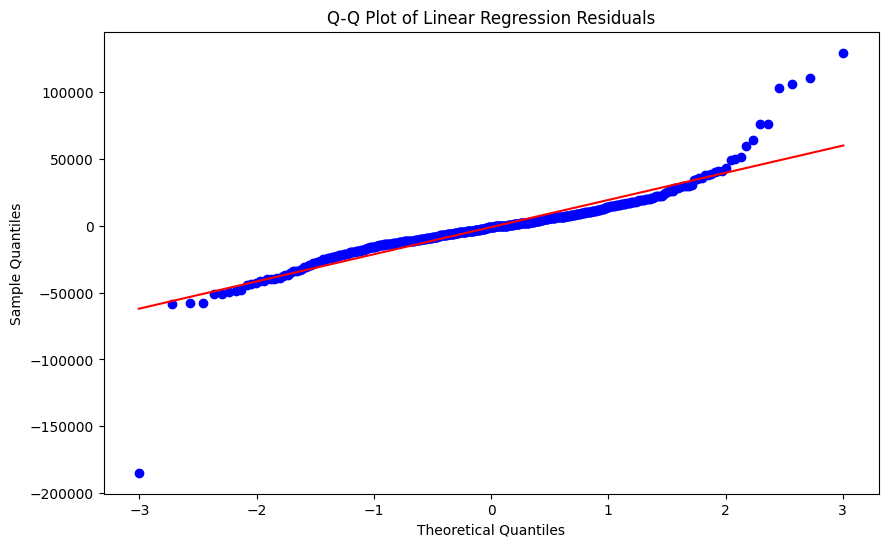

In [2]:
# Import necessary libraries

import scipy.stats as stats


# Cell 2: Use the imported functions
file_path = 'merged3.csv'  # Update this path to the location of your file
target_column = 'SalePrice_x'
drop_columns = ['Unnamed: 0', 'PID', 'Index']

# Load the data
data = load_data(file_path)

# Preprocess the data
X_preprocessed, y, preprocessor = preprocess_data(data, target_column, drop_columns)

# Split the data
X_train, X_test, y_train, y_test = split_data(X_preprocessed, y)

# Define and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Make predictions with the Linear Regression model
y_pred_lr = linear_regression.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Model Mean Squared Error: {mse_lr}')
print(f'Linear Regression Model R-squared: {r2_lr}')

# Calculate residuals
residuals = y_test - y_pred_lr

# Create Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Linear Regression Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


# Below is a ridge and also a lasso regression with a lasso alpha of 7 giving the highest R^2 score of .93 and the highest R^2 of Ridge at alpha 10 of .925

/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['MA_Line2' 'X2TPr_D' 'X2TSc_D' 'X2TPr_S' 'X2TSc_S' 'PA-PostD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Running Lasso with alpha=0.001
Lasso Model Mean Squared Error for alpha=0.001: 745676326.6202334
Lasso Model R-squared for alpha=0.001: 0.8746697167162354
Running Lasso with alpha=0.01
Lasso Model Mean Squared Error for alpha=0.01: 655628948.6343994
Lasso Model R-squared for alpha=0.01: 0.889804518491527
Running Lasso with alpha=0.1


/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.616e+09, tolerance: 1.178e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Model Mean Squared Error for alpha=0.1: 422881265.9092139
Lasso Model R-squared for alpha=0.1: 0.9289238145831722
Running Lasso with alpha=1


/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+10, tolerance: 1.178e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Model Mean Squared Error for alpha=1: 410670761.3197309
Lasso Model R-squared for alpha=1: 0.9309761071726043
Running Lasso with alpha=7
Lasso Model Mean Squared Error for alpha=7: 403202658.020922
Lasso Model R-squared for alpha=7: 0.9322313159925951
Running Lasso with alpha=10
Lasso Model Mean Squared Error for alpha=10: 405396102.88446176
Lasso Model R-squared for alpha=10: 0.9318626505860363
Running Ridge with alpha=0.001
Ridge Model Mean Squared Error for alpha=0.001: 487392505.8677285
Ridge Model R-squared for alpha=0.001: 0.9180810243666266
Running Ridge with alpha=0.01
Ridge Model Mean Squared Error for alpha=0.01: 486633062.82112
Ridge Model R-squared for alpha=0.01: 0.9182086685049362
Running Ridge with alpha=0.1
Ridge Model Mean Squared Error for alpha=0.1: 482401819.78480834
Ridge Model R-squared for alpha=0.1: 0.9189198388471502
Running Ridge with alpha=1
Ridge Model Mean Squared Error for alpha=1: 469273000.9778924
Ridge Model R-squared for alpha=1: 0.92112647800345

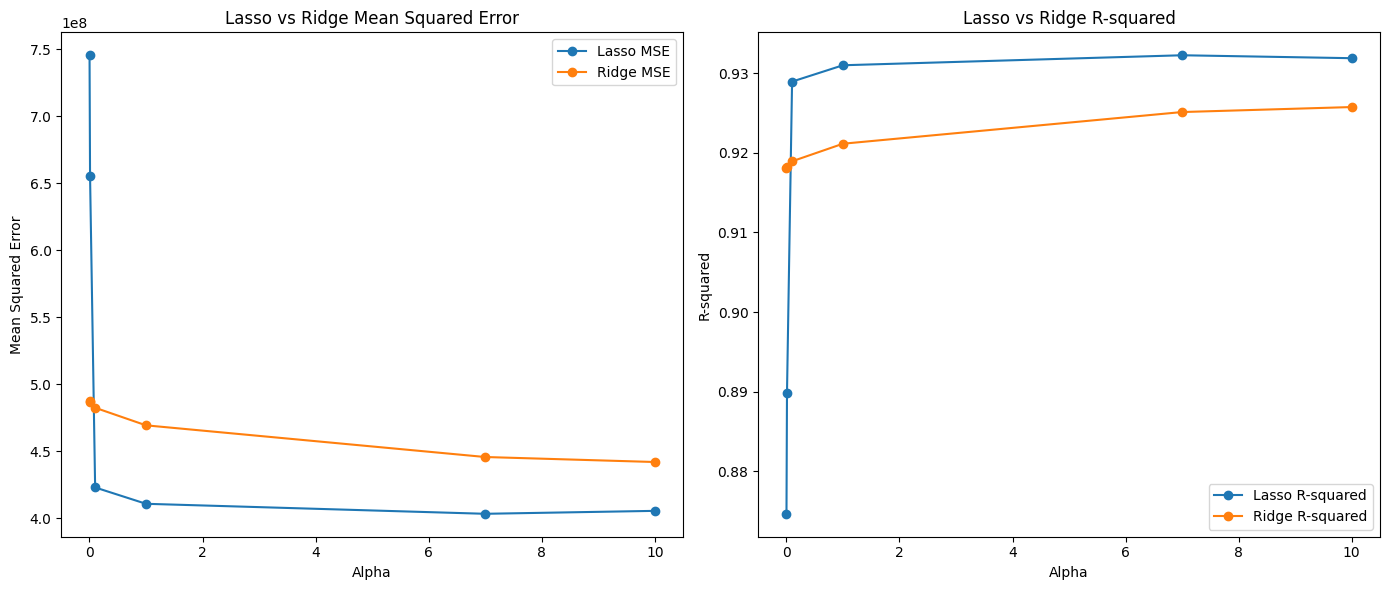

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Import the functions from the module
from data_processing_module import load_data, preprocess_data, split_data

# Cell 2: Use the imported functions
file_path = 'merged3.csv'  # Update this path to the location of your file
target_column = 'SalePrice_x'
drop_columns = ['Unnamed: 0', 'PID', 'Index']

# Load the data
data = load_data(file_path)

# Preprocess the data
X_preprocessed, y, preprocessor = preprocess_data(data, target_column, drop_columns)

# Split the data
X_train, X_test, y_train, y_test = split_data(X_preprocessed, y)

# Define the alpha values for Lasso and Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 7, 10 ]

# Initialize the results dictionary for Lasso and Ridge
results_lasso = {}
results_ridge = {}

# Lasso regression
for alpha in alpha_values:
    print(f"Running Lasso with alpha={alpha}")

    # Define and fit the Lasso model
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)

    # Make predictions
    y_pred_lasso = lasso.predict(X_test)

    # Evaluate the Lasso model
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    print(f'Lasso Model Mean Squared Error for alpha={alpha}: {mse_lasso}')
    print(f'Lasso Model R-squared for alpha={alpha}: {r2_lasso}')

    # Store the results
    results_lasso[alpha] = {
        'mse': mse_lasso,
        'r2': r2_lasso
    }

# Ridge regression
for alpha in alpha_values:
    print(f"Running Ridge with alpha={alpha}")

    # Define and fit the Ridge model
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)

    # Make predictions
    y_pred_ridge = ridge.predict(X_test)

    # Evaluate the Ridge model
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    print(f'Ridge Model Mean Squared Error for alpha={alpha}: {mse_ridge}')
    print(f'Ridge Model R-squared for alpha={alpha}: {r2_ridge}')

    # Store the results
    results_ridge[alpha] = {
        'mse': mse_ridge,
        'r2': r2_ridge
    }

# Plotting the results
alphas = list(results_lasso.keys())
mse_lasso_values = [results_lasso[alpha]['mse'] for alpha in alphas]
r2_lasso_values = [results_lasso[alpha]['r2'] for alpha in alphas]
mse_ridge_values = [results_ridge[alpha]['mse'] for alpha in alphas]
r2_ridge_values = [results_ridge[alpha]['r2'] for alpha in alphas]

plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_lasso_values, label='Lasso MSE', marker='o')
plt.plot(alphas, mse_ridge_values, label='Ridge MSE', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso vs Ridge Mean Squared Error')
plt.legend()

# Plot R-squared
plt.subplot(1, 2, 2)
plt.plot(alphas, r2_lasso_values, label='Lasso R-squared', marker='o')
plt.plot(alphas, r2_ridge_values, label='Ridge R-squared', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Lasso vs Ridge R-squared')
plt.legend()

plt.tight_layout()
plt.show()
